In [62]:
%matplotlib inline
from edgenerator import make_graph
from biom import load_table
from jinja2 import Environment
from json import dumps

import pandas as pd
import numpy as np
import networkx as nx

In [8]:
def load_mf(fn):
    _df = pd.read_csv(fn, sep='\t', dtype=str, keep_default_na=False, na_values=[])
    _df.set_index('#SampleID', inplace=True)
    return _df

In [9]:
mf = load_mf('/Users/yoshikivazquezbaeza/Documents/PDF/KnightLaboratory/VazquezBaezaDogs/mapping-file-full.alpha.txt')
bt = load_table("/Users/yoshikivazquezbaeza/Documents/PDF/KnightLaboratory/VazquezBaezaDogs/otu_table.15000.no-diarrhea.biom")

In [17]:
mf['latitude'] = pd.to_numeric(mf['latitude'], errors='coerce')
mf['longitude'] = pd.to_numeric(mf['longitude'], errors='coerce')

In [30]:
# add some noise :L
mf['latitude'] = mf['latitude'] + np.random.normal(size=len(mf))
mf['longitude'] = mf['longitude'] + np.random.normal(size=len(mf))

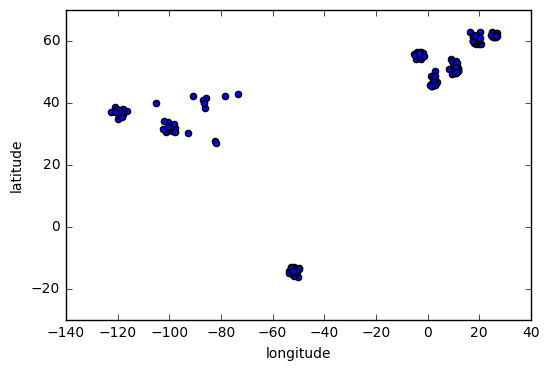

In [31]:
mf.plot('longitude', 'latitude', kind='scatter')

In [113]:
g = make_graph(bt, 2000)
g.number_of_nodes()

144

In [114]:
# get only these two columns as a dict, retrieving
# only samples present in the graph
attribs = mf[['latitude', 'longitude']].loc[g.nodes()].to_dict()

nx.set_node_attributes(g, 'latitude', attribs['latitude'])
nx.set_node_attributes(g, 'longitude', attribs['longitude'])

In [115]:
edges = []

for edge in g.edges_iter():
    u, v = edge
    edges.append({'origin': {'latitude': attribs['latitude'][u], 'longitude':attribs['longitude'][u]},
                  'destination': {'latitude': attribs['latitude'][v], 'longitude': attribs['longitude'][v]},
                  'taxonomy': g.get_edge_data(*edge)})

In [120]:
with open('template.html', 'r') as f:
    template = Environment().from_string(f.read())

with open('generated.html', 'w') as f:
    f.write(template.render(edge_data=dumps(edges)))